In [8]:
import sys, platform, os, textwrap, json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!python --version

Python 3.12.7


In [6]:
tx_path = "transaction_fraud_data.parquet"
fx_path = "historical_currency_exchange.parquet"

df_tx = pd.read_parquet(tx_path)
df_fx = pd.read_parquet(fx_path)


df_tx.head(), df_fx.head()

(  transaction_id customer_id       card_number                  timestamp  \
 0    TX_a0ad2a2a  CUST_72886  6646734767813109 2024-09-30 00:00:01.034820   
 1    TX_3599c101  CUST_70474   376800864692727 2024-09-30 00:00:01.764464   
 2    TX_a9461c6d  CUST_10715  5251909460951913 2024-09-30 00:00:02.273762   
 3    TX_7be21fc4  CUST_16193   376079286931183 2024-09-30 00:00:02.297466   
 4    TX_150f490b  CUST_87572  6172948052178810 2024-09-30 00:00:02.544063   
 
   vendor_category vendor_type          vendor     amount currency    country  \
 0      Restaurant   fast_food       Taco Bell     294.87      GBP         UK   
 1   Entertainment      gaming           Steam    3368.97      BRL     Brazil   
 2         Grocery    physical     Whole Foods  102582.38      JPY      Japan   
 3             Gas       major           Exxon     630.60      AUD  Australia   
 4      Healthcare     medical  Medical Center  724949.27      NGN    Nigeria   
 
    ... is_card_present   device channel  

In [ ]:
summary = {
    "transaction_data_shape": df_tx.shape,
    "currency_data_shape": df_fx.shape,
    "transaction_data_types": df_tx.dtypes.astype(str).to_dict(),
    "currency_data_types": df_fx.dtypes.astype(str).to_dict(),
    "transaction_missing": df_tx.isna().sum().to_dict(),
    "currency_missing": df_fx.isna().sum().to_dict(),
    "transaction_amount_stats": df_tx["amount"].describe().to_dict(),
    "fraud_rate": df_tx["is_fraud"].mean()
}

summary


{'transaction_data_shape': (7483766, 23),
 'currency_data_shape': (31, 12),
 'transaction_data_types': {'transaction_id': 'object',
  'customer_id': 'object',
  'card_number': 'int64',
  'timestamp': 'datetime64[us]',
  'vendor_category': 'object',
  'vendor_type': 'object',
  'vendor': 'object',
  'amount': 'float64',
  'currency': 'object',
  'country': 'object',
  'city': 'object',
  'city_size': 'object',
  'card_type': 'object',
  'is_card_present': 'bool',
  'device': 'object',
  'channel': 'object',
  'device_fingerprint': 'object',
  'ip_address': 'object',
  'is_outside_home_country': 'bool',
  'is_high_risk_vendor': 'bool',
  'is_weekend': 'bool',
  'last_hour_activity': 'object',
  'is_fraud': 'bool'},
 'currency_data_types': {'date': 'object',
  'AUD': 'float64',
  'BRL': 'float64',
  'CAD': 'float64',
  'EUR': 'float64',
  'GBP': 'float64',
  'JPY': 'float64',
  'MXN': 'float64',
  'NGN': 'float64',
  'RUB': 'float64',
  'SGD': 'float64',
  'USD': 'int64'},
 'transaction_m

In [25]:
df_tx["currency"].value_counts(normalize=True)

currency
USD    1.0
Name: proportion, dtype: float64

In [ ]:
# df_tx["date"] = df_tx["timestamp"].dt.date
# df_fx["date"] = pd.to_datetime(df_fx["date"]).dt.date

# def convert_to_usd(row):
#     if row["currency"] == "USD":
#         return row["amount"]
#     rate_row = df_fx[df_fx["date"] == row["date"]]
#     if rate_row.empty:
#         return np.nan
#     rate = rate_row.iloc[0][row["currency"]]
#     return row["amount"] / rate if rate > 0 else np.nan

# df_tx["usd_amount"] = df_tx.apply(convert_to_usd, axis=1)

# df_tx[["transaction_id", "amount", "currency", "date", "usd_amount"]].head(10)


df_tx = df_tx[df_tx["currency"]=="USD"]
df_tx["usd_amount"] = df_tx["amount"]

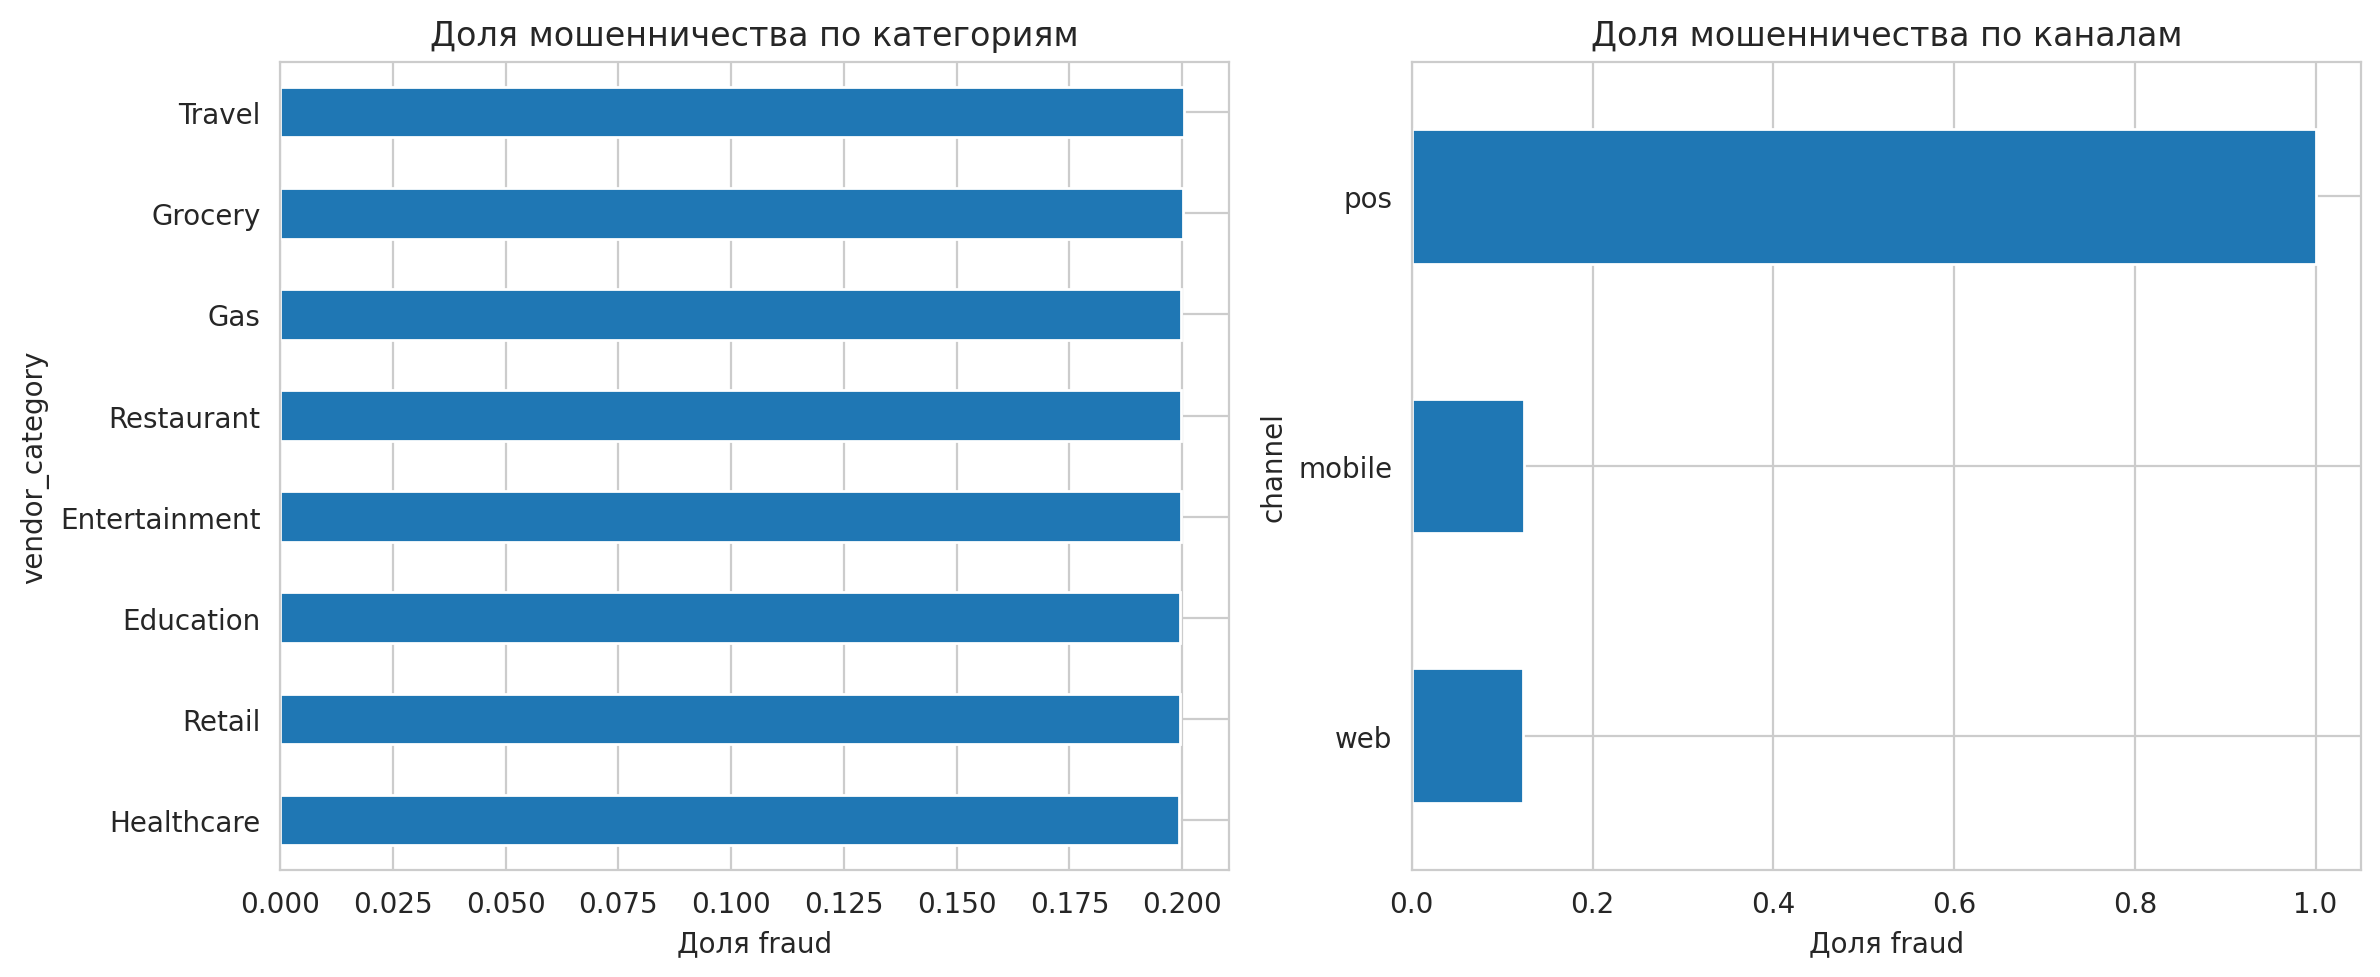

In [11]:
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


fraud_by_category = df_tx.groupby("vendor_category")["is_fraud"].mean().sort_values()
fraud_by_category.plot(kind="barh", ax=axes[0])
axes[0].set_title("Доля мошенничества по категориям")
axes[0].set_xlabel("Доля fraud")

fraud_by_channel = df_tx.groupby("channel")["is_fraud"].mean().sort_values()
fraud_by_channel.plot(kind="barh", ax=axes[1])
axes[1].set_title("Доля мошенничества по каналам")
axes[1].set_xlabel("Доля fraud")

plt.tight_layout()
plt.show()

/tmp/ipykernel_2534827/2219162604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx["day_of_week"] = df_tx["timestamp"].dt.day_name()


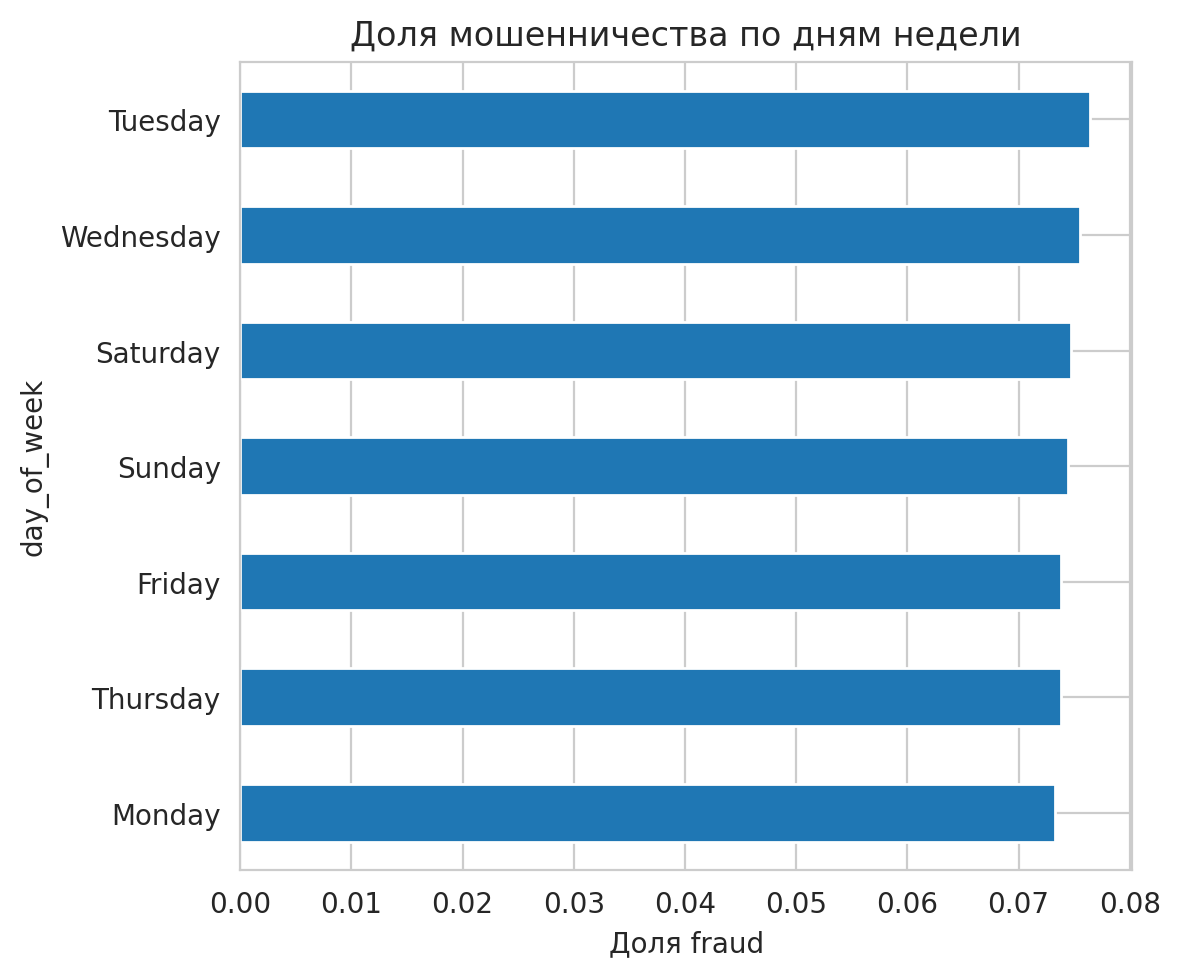

In [26]:
df_tx["day_of_week"] = df_tx["timestamp"].dt.day_name()

%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 1, figsize=(6, 5))

fraud_by_day_of_week = df_tx.groupby("day_of_week")["is_fraud"].mean().sort_values()
fraud_by_day_of_week.plot(kind="barh", ax=axes)
axes.set_title("Доля мошенничества по дням недели")
axes.set_xlabel("Доля fraud")


plt.tight_layout()
plt.show()

In [ ]:
df_tx = df_tx[df_tx["currency"]=="USD"]
df_tx["usd_amount"] = df_tx["amount"].values

/tmp/ipykernel_2534827/3421611765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx["usd_amount"] = df_tx["amount"]


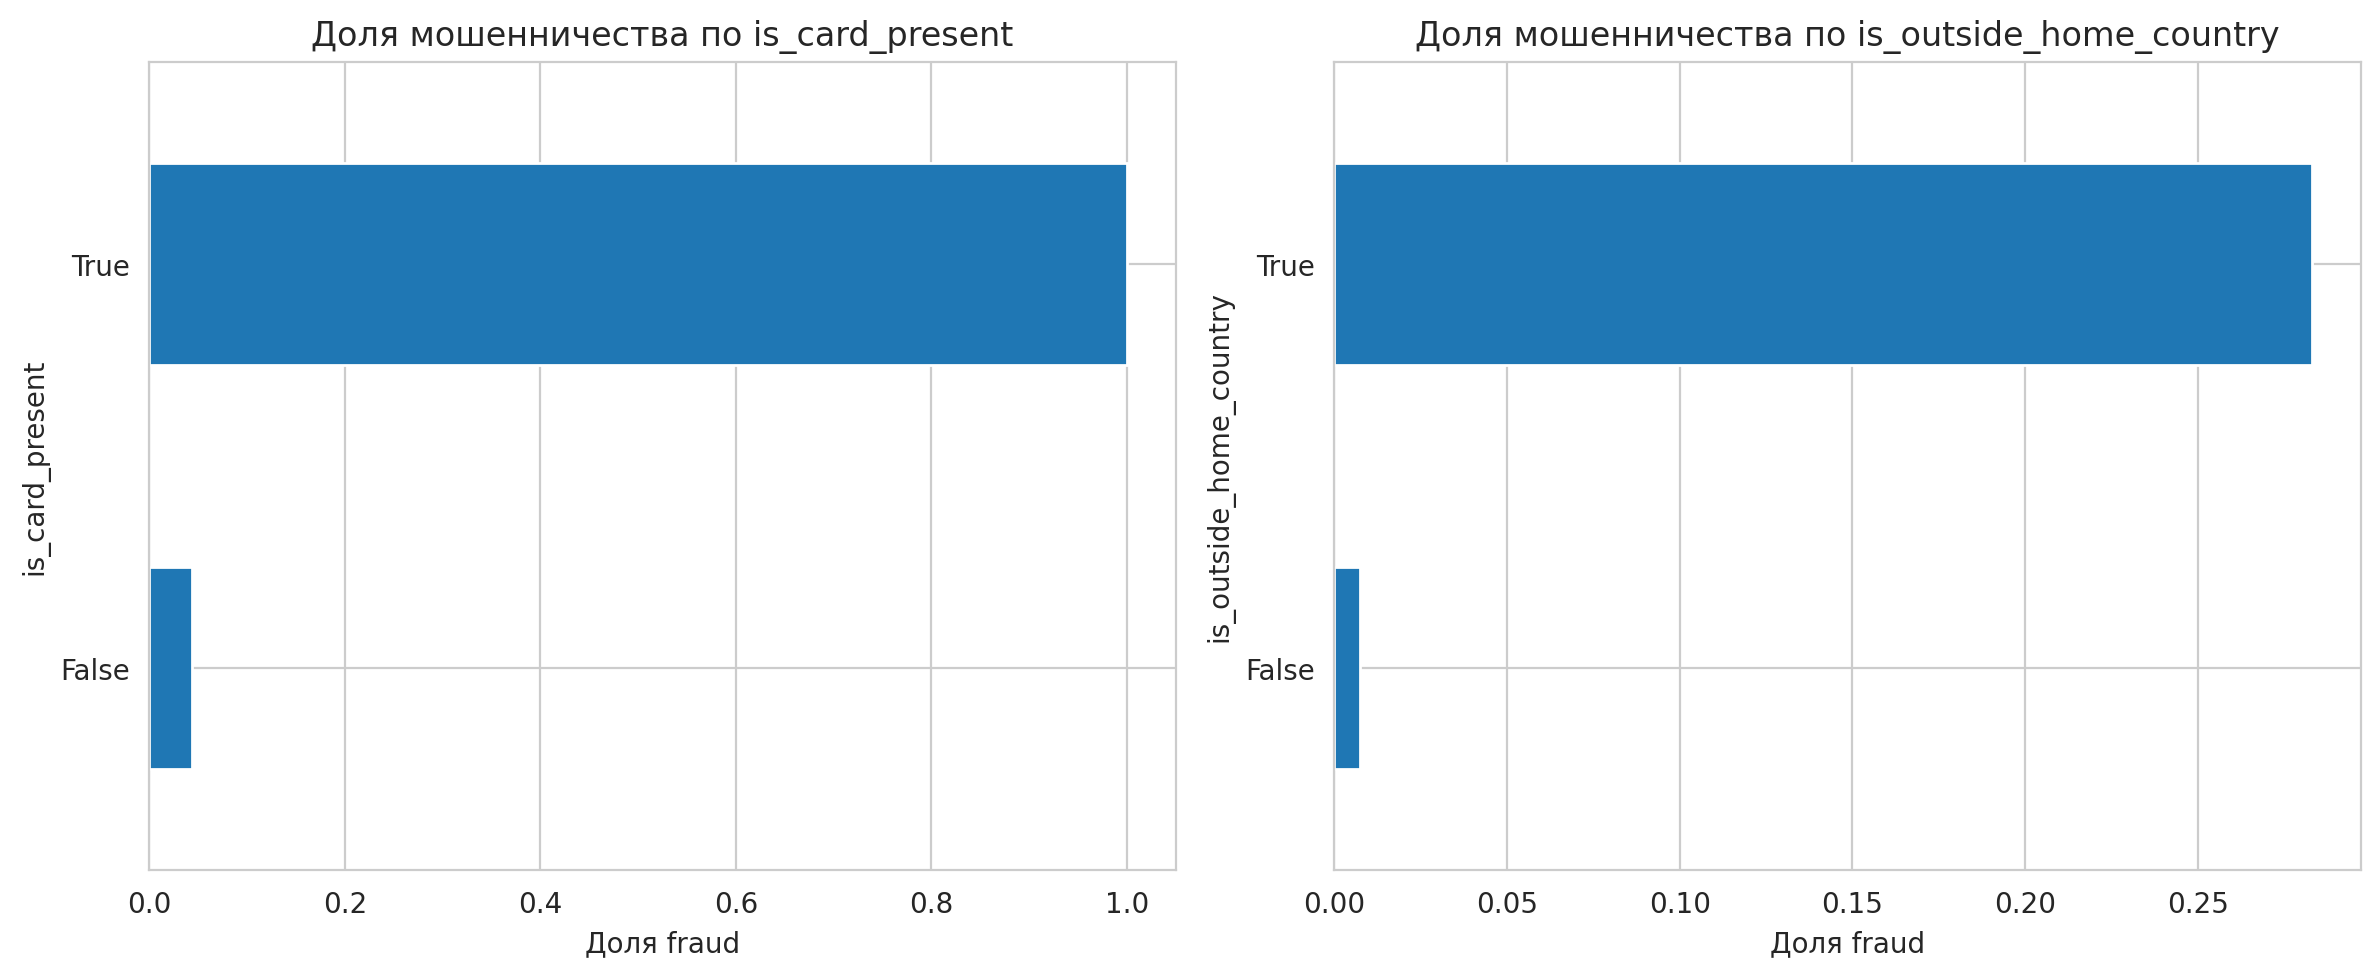

In [30]:
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fraud_by_is_card_present = df_tx.groupby("is_card_present")["is_fraud"].mean().sort_values()
fraud_by_is_card_present.plot(kind="barh", ax=axes[0])
axes[0].set_title("Доля мошенничества по is_card_present")
axes[0].set_xlabel("Доля fraud")


fraud_by_is_outside_home_country = df_tx.groupby("is_outside_home_country")["is_fraud"].mean().sort_values()
fraud_by_is_outside_home_country.plot(kind="barh", ax=axes[1])
axes[1].set_title("Доля мошенничества по is_outside_home_country")
axes[1].set_xlabel("Доля fraud")
plt.tight_layout()
plt.show()

In [ ]:
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 1, figsize=(12, 5))

df_tx[df_tx["is"]]


plt.tight_layout()
plt.show()

In [20]:
bin_cols = ["is_card_present", "is_outside_home_country", "is_high_risk_vendor", "is_weekend"]
fraud_by_binaries = (
    df_tx.groupby(bin_cols)["is_fraud"]
    .mean()
    .reset_index()
    .rename(columns={"is_fraud": "fraud_rate"})
)

fraud_by_dow = df_tx.groupby("day_of_week")["is_fraud"].mean().sort_values(ascending=False)
fraud_by_channel = df_tx.groupby("channel")["is_fraud"].mean().sort_values(ascending=False)


avg_usd_by_cat = df_tx.groupby("vendor_category")["usd_amount"].mean().sort_values(ascending=False)
avg_usd_by_channel = df_tx.groupby("channel")["usd_amount"].mean().sort_values(ascending=False)


vendor_stats = (
    df_tx.groupby("vendor")
    .agg(n=("transaction_id", "count"),
         fraud_rate=("is_fraud", "mean"),
         avg_usd=("usd_amount", "mean"))
    .sort_values(["fraud_rate","n"], ascending=False)
)
suspicious_vendors = vendor_stats[vendor_stats["n"] >= 2].head(5)


print("Fraud-rate по дням недели:\n", fraud_by_dow, "\n")
print("Fraud-rate по каналам:\n", fraud_by_channel, "\n")
print("Средний чек (USD) по категориям:\n", avg_usd_by_cat, "\n")
print("Подозрительные вендоры (>=2 транзакций):\n", suspicious_vendors, "\n")


Fraud-rate по дням недели:
 day_of_week
Tuesday      0.076388
Wednesday    0.075528
Saturday     0.074689
Sunday       0.074415
Friday       0.073828
Thursday     0.073793
Monday       0.073305
Name: is_fraud, dtype: float64 

Fraud-rate по каналам:
 channel
pos       1.000000
mobile    0.044299
web       0.043308
Name: is_fraud, dtype: float64 

Средний чек (USD) по категориям:
 vendor_category
Travel           1027.640780
Retail            680.219673
Education         540.820422
Healthcare        540.113380
Gas               538.998235
Grocery           447.776071
Entertainment     386.690840
Restaurant        361.956882
Name: usd_amount, dtype: float64 

Подозрительные вендоры (>=2 транзакций):
               n  fraud_rate      avg_usd
vendor                                  
Hilton     2634    0.091116   864.009742
Steam      4166    0.085694   358.180730
Food Lion  4572    0.082896   425.435470
Expedia    3163    0.082833  1675.624341
Shell      5121    0.082406   547.618709 



In [ ]:
high_amount_threshold = df_tx["usd_amount"].quantile(0.9)
web_mobile = df_tx["channel"].isin(["pos"])

score = (
    2*df_tx["is_outside_home_country"].astype(int) +
    2*df_tx["is_high_risk_vendor"].astype(int) +
    1*((web_mobile) & (~df_tx["is_card_present"])).astype(int) +
    1*(df_tx["usd_amount"] > high_amount_threshold).astype(int) +
    1*df_tx["is_weekend"].astype(int)
)

df_tx["fraud_score"] = score
df_tx["pred_fraud"] = (score >= 3).astype(int)

y_true = df_tx["is_fraud"].astype(int)
y_pred = df_tx["pred_fraud"]

tp = int(((y_true==1) & (y_pred==1)).sum())
fp = int(((y_true==0) & (y_pred==1)).sum())
tn = int(((y_true==0) & (y_pred==0)).sum())
fn = int(((y_true==1) & (y_pred==0)).sum())

precision = tp/(tp+fp) if (tp+fp)>0 else 0.0
recall = tp/(tp+fn) if (tp+fn)>0 else 0.0
f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0.0

print(f"Порог для высокой суммы (90-й перцентиль): {high_amount_threshold:.2f} USD")
print(f"TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")


df_tx.sort_values("fraud_score", ascending=False)[
    ["transaction_id","usd_amount","channel","is_card_present","is_outside_home_country",
     "is_high_risk_vendor","is_weekend","fraud_score","is_fraud"]
].head(10)


Порог для высокой суммы (90-й перцентиль): 1202.81 USD
TP=11374, FP=26754, TN=435994, FN=25938
Precision=0.30, Recall=0.30, F1=0.30


,transaction_id,usd_amount,channel,is_card_present,is_outside_home_country,is_high_risk_vendor,is_weekend,fraud_score,is_fraud
3103477,TX_08be8e03,1543.27,web,False,True,True,True,6,False
3103454,TX_7cb57d73,1600.75,web,False,True,True,True,6,False
1511997,TX_dfcce8bf,2731.52,web,False,True,True,True,6,True
1511795,TX_cbf63a4f,2561.60,web,False,True,True,True,6,False
1511358,TX_98d9eeea,1581.30,mobile,False,True,True,True,6,False
3094943,TX_bd459087,1465.86,web,False,True,True,True,6,False
3096453,TX_40aa277d,1809.87,mobile,False,True,True,True,6,False
3104405,TX_1a4cc03a,2535.50,web,False,True,True,True,6,False
3104818,TX_ff323f1d,1936.37,web,False,True,True,True,6,False
3093153,TX_28e0f9ff,1777.45,web,False,True,True,True,6,False
